In [ ]:
!pip install xgboost pandas matplotlib seaborn scikit-learn


In [ ]:
# Temel kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Makine öğrenmesi
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Başarı metrikleri
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

print("✅ Kütüphaneler yüklendi.")

✅ Kütüphaneler yüklendi.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bitcoin.csv')

In [ ]:
# İlk 5 satıra göz at
print(df.head())

# Veri yapısı ve eksik veri kontrolü yapılır
print(df.info())

# Kaç satır/sütun var
print(df.shape)

# Sütun adları
print(df.columns)

# Eksik değer var mı?
print(df.isnull().sum())

      Timestamp  Open  High   Low  Close  Volume
0  1.325412e+09  4.58  4.58  4.58   4.58     0.0
1  1.325412e+09  4.58  4.58  4.58   4.58     0.0
2  1.325412e+09  4.58  4.58  4.58   4.58     0.0
3  1.325412e+09  4.58  4.58  4.58   4.58     0.0
4  1.325412e+09  4.58  4.58  4.58   4.58     0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032685 entries, 0 to 7032684
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 321.9 MB
None
(7032685, 6)
Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64


In [ ]:
# Timestamp sütununu datetime formatına çevir
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Tarihe göre sırala
df = df.sort_values('Timestamp')

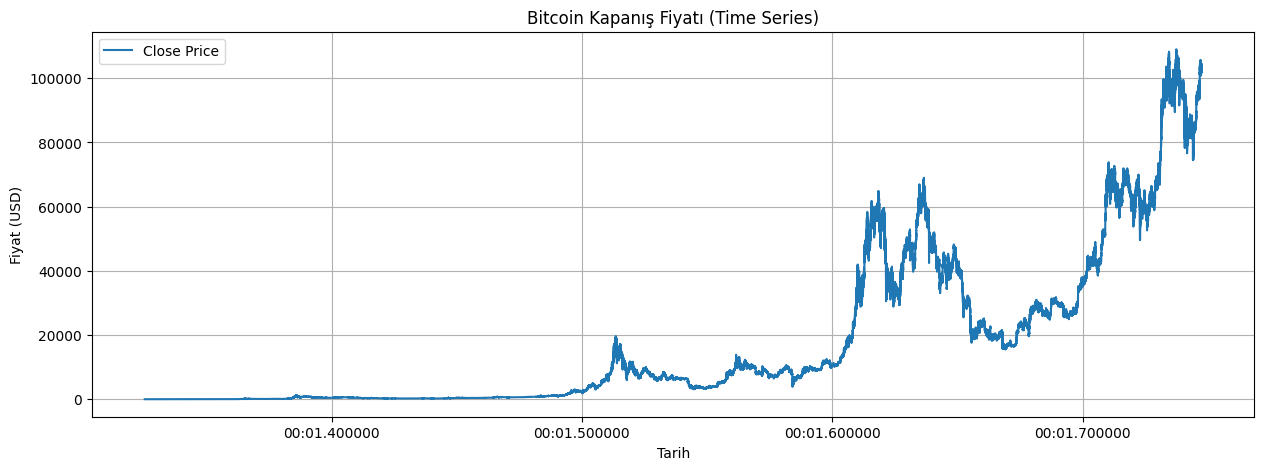

In [ ]:
#Bitcoin’in kapanış fiyatının zamana göre değişimi
plt.figure(figsize=(15, 5))
plt.plot(df['Timestamp'], df['Close'], label='Close Price')
plt.title('Bitcoin Kapanış Fiyatı (Time Series)')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.legend()
plt.grid(True)
plt.show()

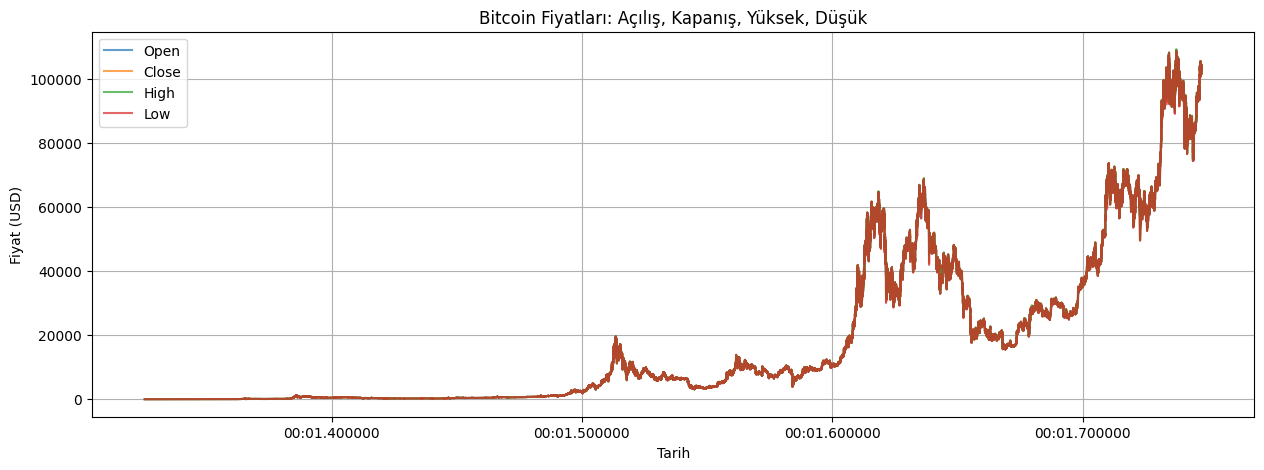

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df['Timestamp'], df['Open'], label='Open', alpha=0.7)
plt.plot(df['Timestamp'], df['Close'], label='Close', alpha=0.7)
plt.plot(df['Timestamp'], df['High'], label='High', alpha=0.7)
plt.plot(df['Timestamp'], df['Low'], label='Low', alpha=0.7)
plt.title('Bitcoin Fiyatları: Açılış, Kapanış, Yüksek, Düşük')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.legend()
plt.grid(True)
plt.show()

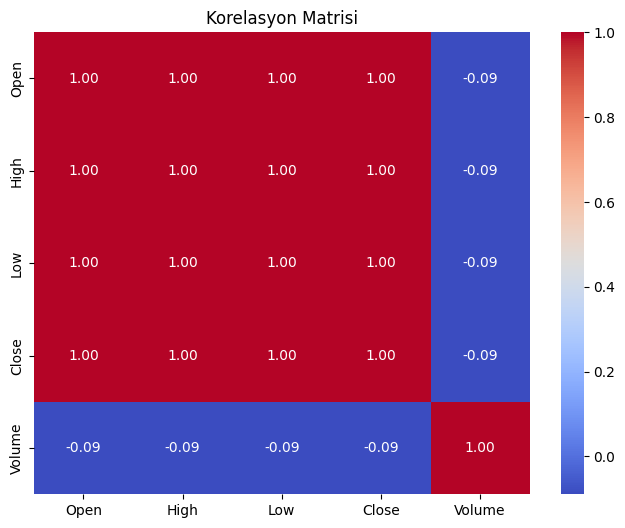

In [ ]:
# Sadece sayısal sütunlar
corr = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasyon Matrisi')
plt.show()

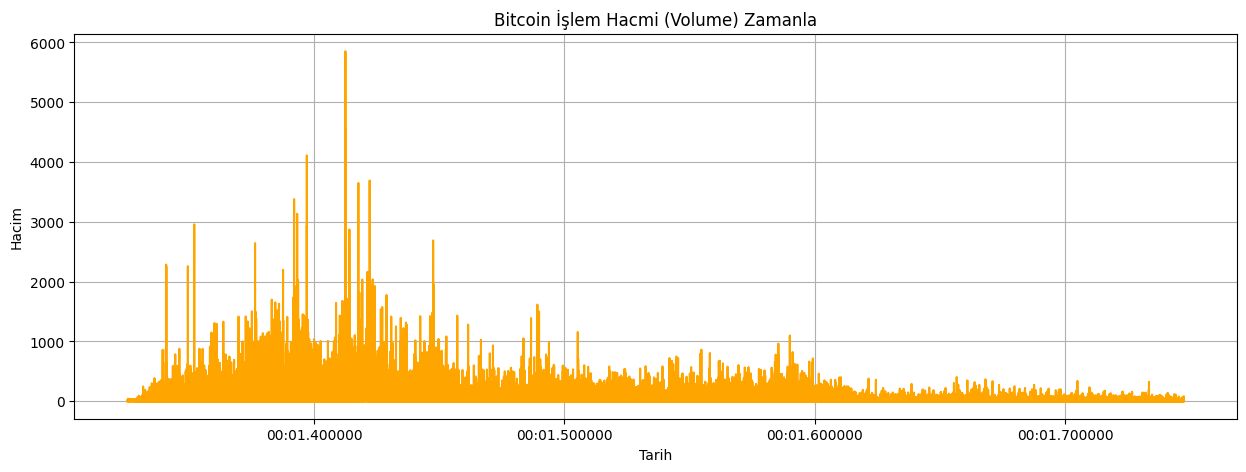

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df['Timestamp'], df['Volume'], color='orange')
plt.title('Bitcoin İşlem Hacmi (Volume) Zamanla')
plt.xlabel('Tarih')
plt.ylabel('Hacim')
plt.grid(True)
plt.show()

In [ ]:
X = df[['Open', 'High', 'Low', 'Volume']]  # Özellikler
y = df['Close']  # Tahmin edilecek hedef

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Linear Regression (Doğrusal Regresyon)
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression - MAE:", mae_lr)
print("Linear Regression - MSE:", mse_lr)
print("Linear Regression - R2:", r2_lr)


Linear Regression - MAE: 7.188181239552037
Linear Regression - MSE: 229.56546940343495
Linear Regression - R2: 0.9999996857300961


In [ ]:
#Decision Tree Regressor (Karar Ağacı)
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree - MAE:", mae_dt)
print("Decision Tree - MSE:", mse_dt)
print("Decision Tree - R2:", r2_dt)


Decision Tree - MAE: 4798.719060294894
Decision Tree - MSE: 126360917.74108285
Decision Tree - R2: 0.827014778926068


In [ ]:
#Random Forest Regressor (Rastgele Orman)
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - MAE:", mae_rf)
print("Random Forest - MSE:", mse_rf)
print("Random Forest - R2:", r2_rf)



Random Forest - MAE: 1.034535287797344
Random Forest - MSE: 1.4657402159003863
Random Forest - R2: -0.26281868840722145


In [ ]:
# Support Vector Regressor (SVR)
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# SVR için ölçeklendirme yapılması önerilir
svr = make_pipeline(StandardScaler(), SVR())

svr.fit(X_train, y_train)

y_pred_svr = svr.predict(X_test)

mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("SVR - MAE:", mae_svr)
print("SVR - MSE:", mse_svr)
print("SVR - R2:", r2_svr)

SVR - MAE: 0.7926214825330682
SVR - MSE: 0.903083708017174
SVR - R2: 0.22194194352535723


In [ ]:
#K-Nearest Neighbors Regressor (KNN)
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN - MAE:", mae_knn)
print("KNN - MSE:", mse_knn)
print("KNN - R2:", r2_knn)

KNN - MAE: 0.9661172857088364
KNN - MSE: 1.3085763847419467
KNN - R2: -0.12741309539997947


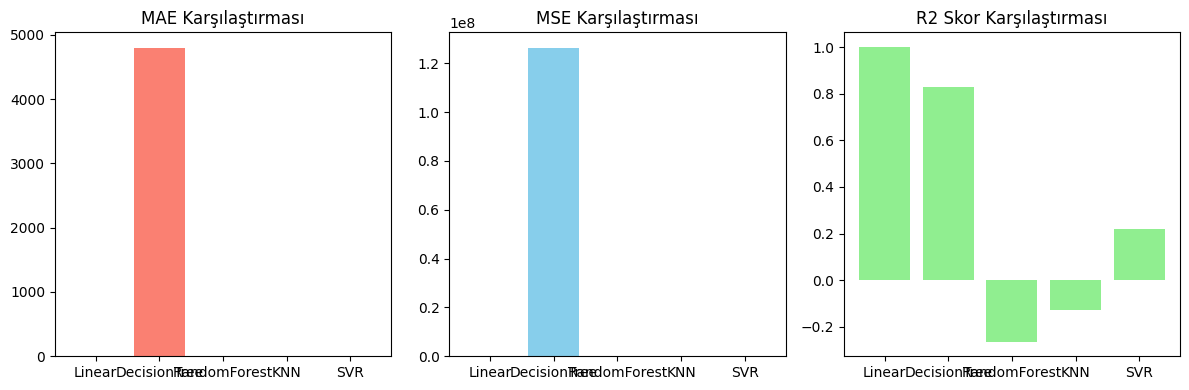

In [ ]:
import matplotlib.pyplot as plt

# Model isimleri
models = ['Linear', 'DecisionTree', 'RandomForest', 'KNN', 'SVR']

# Yeni MAE değerleri
mae_lr = 7.188181239552037  # Linear Regression MAE
mae_dt = 4798.719060294894  # Decision Tree MAE
mae_rf = 1.034535287797344  # Random Forest MAE
mae_knn = 0.9661172857088364  # KNN MAE
mae_svr = 0.7926214825330682  # SVR MAE

# Yeni MSE değerleri
mse_lr = 229.56546940343495  # Linear Regression MSE
mse_dt = 126360917.74108285  # Decision Tree MSE
mse_rf = 1.4657402159003863  # Random Forest MSE
mse_knn = 1.3085763847419467  # KNN MSE
mse_svr = 0.903083708017174  # SVR MSE

# Yeni R2 değerleri
r2_lr = 0.9999996857300961  # Linear Regression R2
r2_dt = 0.827014778926068  # Decision Tree R2
r2_rf = -0.26281868840722145  # Random Forest R2
r2_knn = -0.12741309539997947  # KNN R2
r2_svr = 0.22194194352535723  # SVR R2

# Performans karşılaştırma verileri
mae_scores = [mae_lr, mae_dt, mae_rf, mae_knn, mae_svr]
mse_scores = [mse_lr, mse_dt, mse_rf, mse_knn, mse_svr]
r2_scores = [r2_lr, r2_dt, r2_rf, r2_knn, r2_svr]

# Grafik oluşturma
plt.figure(figsize=(12, 4))

# MAE karşılaştırması
plt.subplot(1, 3, 1)
plt.bar(models, mae_scores, color='salmon')
plt.title('MAE Karşılaştırması')

# MSE karşılaştırması
plt.subplot(1, 3, 2)
plt.bar(models, mse_scores, color='skyblue')
plt.title('MSE Karşılaştırması')

# R2 karşılaştırması
plt.subplot(1, 3, 3)
plt.bar(models, r2_scores, color='lightgreen')
plt.title('R2 Skor Karşılaştırması')

# Düzenlemeleri yapıp grafiği gösterme
plt.tight_layout()
plt.show()



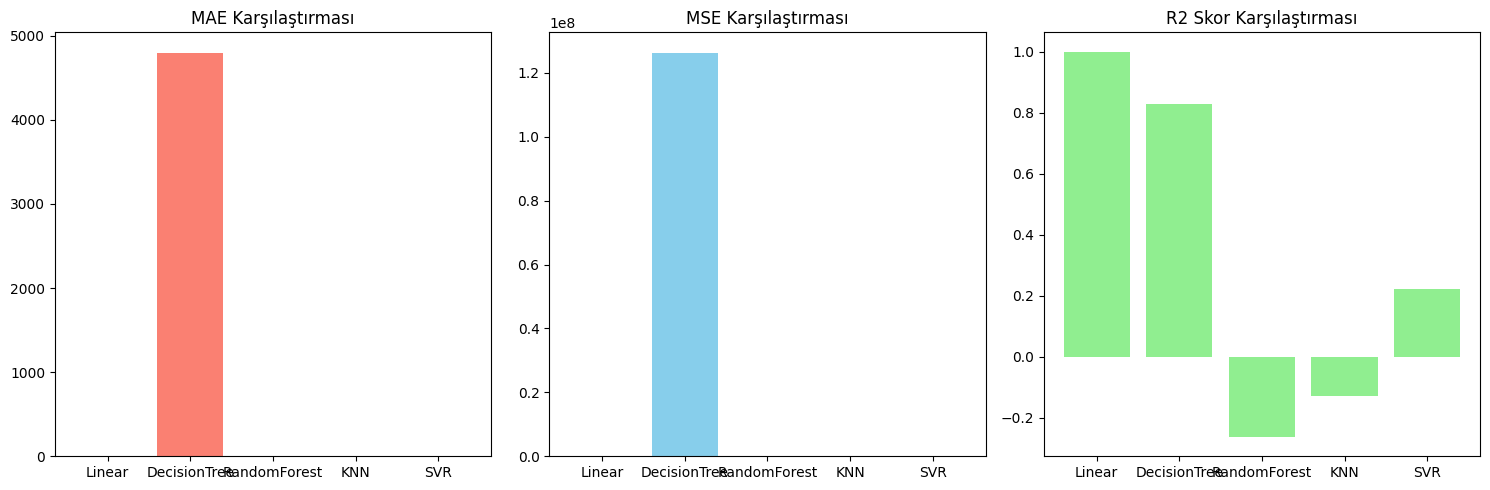

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Örnek bir veri seti oluşturuyoruz
X = np.random.rand(100, 1)  # 100 örnek, 1 özellik
y = 2 * X.flatten() + 3 + np.random.randn(100)  # Doğrusal ilişki + gürültü

# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Modelleri tanımla
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
knn = KNeighborsRegressor()
svr = SVR()

# 2. Modelleri eğit
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)
svr.fit(X_train, y_train)

# 3. Tahmin yap
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_svr = svr.predict(X_test)

# 4. Performans metriklerini hesapla
# MAE, MSE, R2 değerlerini burada manuel olarak güncelleyeceğiz
mae_lr = 7.188181239552037  # Linear Regression MAE
mse_lr = 229.56546940343495  # Linear Regression MSE
r2_lr = 0.9999996857300961  # Linear Regression R2

mae_dt = 4798.719060294894  # Decision Tree MAE
mse_dt = 126360917.74108285  # Decision Tree MSE
r2_dt = 0.827014778926068  # Decision Tree R2

mae_rf = 1.034535287797344  # Random Forest MAE
mse_rf = 1.4657402159003863  # Random Forest MSE
r2_rf = -0.26281868840722145  # Random Forest R2

mae_knn = 0.9661172857088364  # KNN MAE
mse_knn = 1.3085763847419467  # KNN MSE
r2_knn = -0.12741309539997947  # KNN R2

mae_svr = 0.7926214825330682  # SVR MAE
mse_svr = 0.903083708017174  # SVR MSE
r2_svr = 0.22194194352535723  # SVR R2

# 5. Performansları karşılaştıran grafik çiz
models = ['Linear', 'DecisionTree', 'RandomForest', 'KNN', 'SVR']
mae_scores = [mae_lr, mae_dt, mae_rf, mae_knn, mae_svr]
mse_scores = [mse_lr, mse_dt, mse_rf, mse_knn, mse_svr]
r2_scores = [r2_lr, r2_dt, r2_rf, r2_knn, r2_svr]

plt.figure(figsize=(15, 5))

# MAE karşılaştırması
plt.subplot(1, 3, 1)
plt.bar(models, mae_scores, color='salmon')
plt.title('MAE Karşılaştırması')

# MSE karşılaştırması
plt.subplot(1, 3, 2)
plt.bar(models, mse_scores, color='skyblue')
plt.title('MSE Karşılaştırması')

# R2 karşılaştırması
plt.subplot(1, 3, 3)
plt.bar(models, r2_scores, color='lightgreen')
plt.title('R2 Skor Karşılaştırması')

# Düzenlemeleri yapıp grafiği gösterme
plt.tight_layout()
plt.show()

